# Visualise Dataset

This notebook is used to play around with the dataset

In [64]:
from digit_classifier import train_test_datasets, train_val_dataset_split
import matplotlib.pyplot as plt
import numpy as np
import torch

In [65]:
train_data, _ = train_test_datasets()
train_set, val_set = train_val_dataset_split(train_data)

[digit_classifier] [INFO] Train size: 60000
[digit_classifier] [INFO] Test size: 10000
[digit_classifier] [INFO] Train set: 50000
[digit_classifier] [INFO] Valid set: 10000


In [66]:
assert all(val_set[i][1] == v2[i][1] for i in range(len(val_set)))

In [67]:
print(train_set[0][0].shape)
print(train_set[0][1])

torch.Size([784])
3


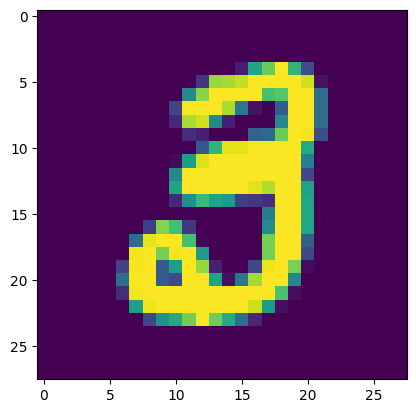

In [68]:
fig, ax = plt.subplots()
ax.imshow(train_set[0][0].detach().cpu().numpy().reshape(28,28))

## Check if data loader is deterministic

In [71]:
latent_dataloader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=False,num_workers=2, drop_last=False)
lbls = [l for _, l in latent_dataloader]
lbls = torch.cat(lbls, dim=0)
print(lbls.shape)

torch.Size([50000])


In [72]:
lbls2 = [l for _, l in latent_dataloader]
lbls2 = torch.cat(lbls2, dim=0)
print(lbls2.shape)

torch.Size([50000])


In [74]:
assert torch.all(lbls == lbls2)